In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from fsspec.registry import known_implementations
#from fs import open_fs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from tensorflow.keras.utils import to_categorical

In [3]:
spotify_df = pd.read_csv('../Resources/tracks.csv')
spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
#  Remove features that create noise and result in improved model
removed_df = spotify_df.drop(columns=['id', 'duration_ms', 'id_artists', 'key', 'mode', 'time_signature','valence', 'tempo','liveness'])
# Drop the null columns where all values are null
spotify_df = removed_df.dropna(axis='columns', how='all')
# Drop the null rows
cleaned_df = removed_df.dropna()
cleaned_df.describe()

,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness
count,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,0.044091,0.563612,0.542071,-10.205789,0.104870,0.449803,0.113425
std,18.369417,0.205298,0.166101,0.251910,5.089422,0.179902,0.348812,0.266843
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.453000,0.343000,-12.891000,0.034000,0.096900,0.000000
50%,27.000000,0.000000,0.577000,0.549000,-9.242000,0.044300,0.422000,0.000024
75%,41.000000,0.000000,0.686000,0.748000,-6.481000,0.076300,0.784000,0.009550
max,100.000000,1.000000,0.991000,1.000000,5.376000,0.971000,0.996000,1.000000


In [5]:
#Review the correlation of popularity to the other attributes
#popularity is our dependent variable for regression (x-value)
pop_corr = cleaned_df.corr()["popularity"]

In [6]:
#This provides the r-value of correlation
pop_corr

popularity          1.000000
explicit            0.211749
danceability        0.186878
energy              0.302178
loudness            0.327001
speechiness        -0.047415
acousticness       -0.370723
instrumentalness   -0.236403
Name: popularity, dtype: float64

In [7]:
#This computes the r-squared value. 
#note: in this example, the higher r-squared value would indicate that the higher the acousticness level, the less popular the song is
pop_r2 = pop_corr*pop_corr

In [8]:
pop_r2

popularity          1.000000
explicit            0.044838
danceability        0.034923
energy              0.091312
loudness            0.106930
speechiness         0.002248
acousticness        0.137436
instrumentalness    0.055886
Name: popularity, dtype: float64

In [9]:
#Temporarily removed popularity column to visualize correlations between other variables easier.  Looking to see if any of the variables is a predictor of another variable (highly correlated).
remove_pop = cleaned_df.drop(columns=['popularity'])
remove_pop.head()

,name,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness
0,Carve,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.7440
1,Capítulo 2.16 - Banquero Anarquista,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.0000
2,Vivo para Quererte - Remasterizado,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.0218
3,El Prisionero - Remasterizado,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.9180
4,Lady of the Evening,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.1300


In [10]:
#Testing different correlation methods to see which one offers the best analysis
var_corr1 = remove_pop.corr(method='kendall')
var_corr1

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness
explicit,1.000000,0.122225,0.101236,0.122786,0.173292,-0.117415,-0.086080
danceability,0.122225,1.000000,0.145264,0.130604,0.151689,-0.137830,-0.153380
energy,0.101236,0.145264,1.000000,0.577148,0.107438,-0.525178,-0.086980
loudness,0.122786,0.130604,0.577148,1.000000,0.012216,-0.367519,-0.183678
speechiness,0.173292,0.151689,0.107438,0.012216,1.000000,-0.020570,-0.075904
acousticness,-0.117415,-0.137830,-0.525178,-0.367519,-0.020570,1.000000,0.073397
instrumentalness,-0.086080,-0.153380,-0.086980,-0.183678,-0.075904,0.073397,1.000000


In [11]:
#Testing different correlation methods to see which one offers the best analysis
var_corr2 = remove_pop.corr(method='pearson')
var_corr2

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness
explicit,1.000000,0.150216,0.123060,0.134598,0.102251,-0.149001,-0.067510
danceability,0.150216,1.000000,0.241464,0.251394,0.199291,-0.242838,-0.225831
energy,0.123060,0.241464,1.000000,0.764744,-0.053560,-0.715366,-0.195727
loudness,0.134598,0.251394,0.764744,1.000000,-0.167140,-0.519423,-0.329255
speechiness,0.102251,0.199291,-0.053560,-0.167140,1.000000,0.069121,-0.102425
acousticness,-0.149001,-0.242838,-0.715366,-0.519423,0.069121,1.000000,0.204312
instrumentalness,-0.067510,-0.225831,-0.195727,-0.329255,-0.102425,0.204312,1.000000


In [12]:
#Testing different correlation methods to see which one offers the best analysis
var_corr3 = remove_pop.corr(method='spearman')
var_corr3

,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness
explicit,1.000000,0.149568,0.123922,0.150376,0.212058,-0.143744,-0.100946
danceability,0.149568,1.000000,0.216573,0.193832,0.234170,-0.202743,-0.219107
energy,0.123922,0.216573,1.000000,0.771030,0.167386,-0.718286,-0.125822
loudness,0.150376,0.193832,0.771030,1.000000,0.021027,-0.528900,-0.258086
speechiness,0.212058,0.234170,0.167386,0.021027,1.000000,-0.037929,-0.111726
acousticness,-0.143744,-0.202743,-0.718286,-0.528900,-0.037929,1.000000,0.110663
instrumentalness,-0.100946,-0.219107,-0.125822,-0.258086,-0.111726,0.110663,1.000000


In [13]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586601 entries, 0 to 586671
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              586601 non-null  object 
 1   popularity        586601 non-null  int64  
 2   explicit          586601 non-null  int64  
 3   artists           586601 non-null  object 
 4   release_date      586601 non-null  object 
 5   danceability      586601 non-null  float64
 6   energy            586601 non-null  float64
 7   loudness          586601 non-null  float64
 8   speechiness       586601 non-null  float64
 9   acousticness      586601 non-null  float64
 10  instrumentalness  586601 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 53.7+ MB


In [14]:
y = cleaned_df.loc[:, 'acousticness']
X = cleaned_df.drop(['name','artists','release_date','acousticness'],axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=100)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_test, y_test)
lin_acc = lin_model.score(X_test, y_test)
print(lin_acc)

0.5538679981437021


In [18]:
print(lin_model.score(X_train,y_train))

0.5539426012504156


In [19]:
y = cleaned_df.loc[:, 'popularity']
X = cleaned_df.drop(['name','artists','release_date','popularity'],axis=1)

In [20]:
lin_model = LinearRegression()
lin_model.fit(X_test, y_test)
lin_acc = lin_model.score(X_test, y_test)
print(lin_acc)

0.5538679981437021


In [21]:
print(lin_model.score(X_train,y_train))

0.5539426012504156


In [22]:
y = cleaned_df.loc[:, 'energy']
X = cleaned_df.drop(['name','artists','release_date','energy'],axis=1)

In [23]:
lin_model = LinearRegression()
lin_model.fit(X_test, y_test)
lin_acc = lin_model.score(X_test, y_test)
print(lin_acc)

0.5538679981437021


In [24]:
print(lin_model.score(X_train,y_train))

0.5539426012504156


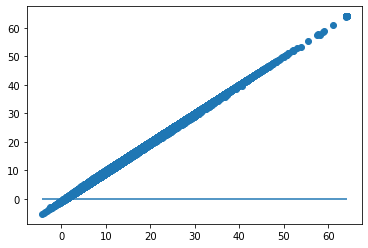

In [32]:
predictions = lin_model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()